In [1]:
import numpy as np
import matplotlib
matplotlib.use('agg')
%matplotlib inline

import matplotlib.pyplot as plt

In [26]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

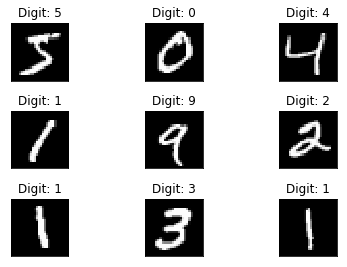

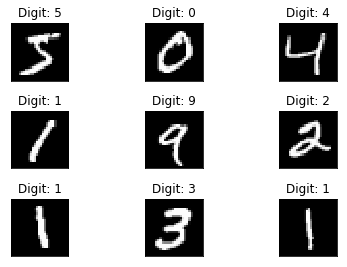

In [29]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

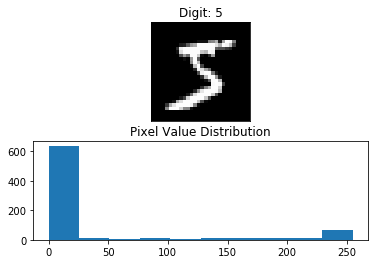

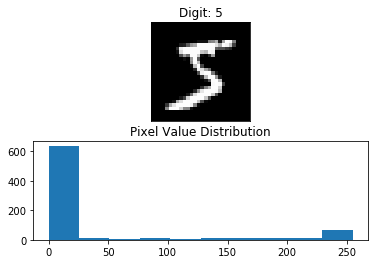

In [30]:

fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [8]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255
#machine 
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [9]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [10]:
# one-hot encoding using keras' numpy-related utilities

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 13s - loss: 0.2454 - acc: 0.9257 - val_loss: 0.1137 - val_acc: 0.9659
Epoch 2/20
 - 13s - loss: 0.1009 - acc: 0.9687 - val_loss: 0.0835 - val_acc: 0.9724
Epoch 3/20
 - 13s - loss: 0.0706 - acc: 0.9775 - val_loss: 0.0792 - val_acc: 0.9751
Epoch 4/20
 - 13s - loss: 0.0550 - acc: 0.9828 - val_loss: 0.0676 - val_acc: 0.9793
Epoch 5/20
 - 13s - loss: 0.0443 - acc: 0.9857 - val_loss: 0.0766 - val_acc: 0.9767
Epoch 6/20
 - 13s - loss: 0.0406 - acc: 0.9864 - val_loss: 0.0806 - val_acc: 0.9755
Epoch 7/20
 - 13s - loss: 0.0352 - acc: 0.9884 - val_loss: 0.0608 - val_acc: 0.9830
Epoch 8/20
 - 13s - loss: 0.0310 - acc: 0.9898 - val_loss: 0.0641 - val_acc: 0.9819
Epoch 9/20
 - 13s - loss: 0.0269 - acc: 0.9909 - val_loss: 0.0763 - val_acc: 0.9788
Epoch 10/20
 - 13s - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0760 - val_acc: 0.9801
Epoch 11/20
 - 13s - loss: 0.0231 - acc: 0.9919 - val_loss: 0.0839 - val_acc: 0.9807
Epoch 12/20
 - 13s - los

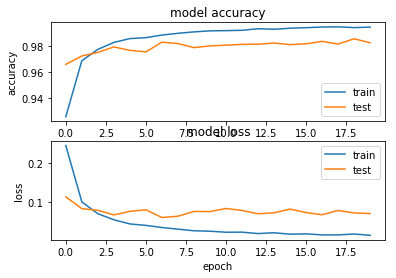

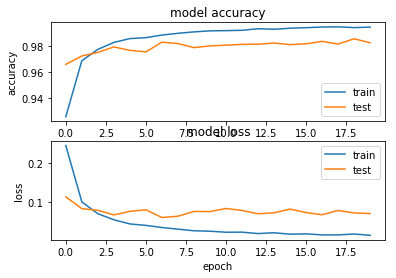

In [28]:
import os
# saving the model
# save_dir = "./result/"
# model_name = 'keras_mnist.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)
#
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

#plt.tight_layout()

fig